# REGRESSION ALGORITHMS

## Reading dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df.size

5330

In [6]:
df.shape

(205, 26)

In [7]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.nunique() #no.of unique values in each column

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [10]:
df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [11]:
df["fueltype"].unique()

array(['gas', 'diesel'], dtype=object)

In [12]:
df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [13]:
df["doornumber"].unique()

array(['two', 'four'], dtype=object)

In [14]:
df["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [15]:
df["drivewheel"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [16]:
df["enginelocation"].unique()

array(['front', 'rear'], dtype=object)

In [17]:
df["enginetype"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [18]:
df["fuelsystem"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [19]:
df["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

### Data Preprocessing

##### Replacing the word with actual numbers

In [20]:
df["doornumber"].replace({"two":2,"four":4},inplace=True) 

In [21]:
df["doornumber"].unique()

array([2, 4], dtype=int64)

In [22]:
df["cylindernumber"].replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8},inplace=True) 

In [23]:
df["cylindernumber"].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

##### Splitting Carname into Brand name and model name

In [24]:
df[['Brand', 'Model']] = df['CarName'].str.split(n=1, expand=True)

In [25]:
df.columns 

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Brand', 'Model'],
      dtype='object')

In [26]:
df["Brand"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [27]:
df["Brand"].replace({"maxda":"mazda","vokswagen":"volkswagen","toyouta":"toyota","Nissan":"nissan","porcshce":"porsche","vw":"volkswagen"},inplace=True)

In [28]:
df["Brand"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

##### Checking null values

In [29]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Brand               0
Model               2
dtype: int64

In [30]:
df.dropna(inplace=True) #dropping null values since there is only 2 null values

##### Check duplicates

In [31]:
df.duplicated().sum()

0

##### Drop CarName & carID

In [32]:
df.drop(["CarName","car_ID"],axis=1,inplace=True)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


##### Detection of outliers

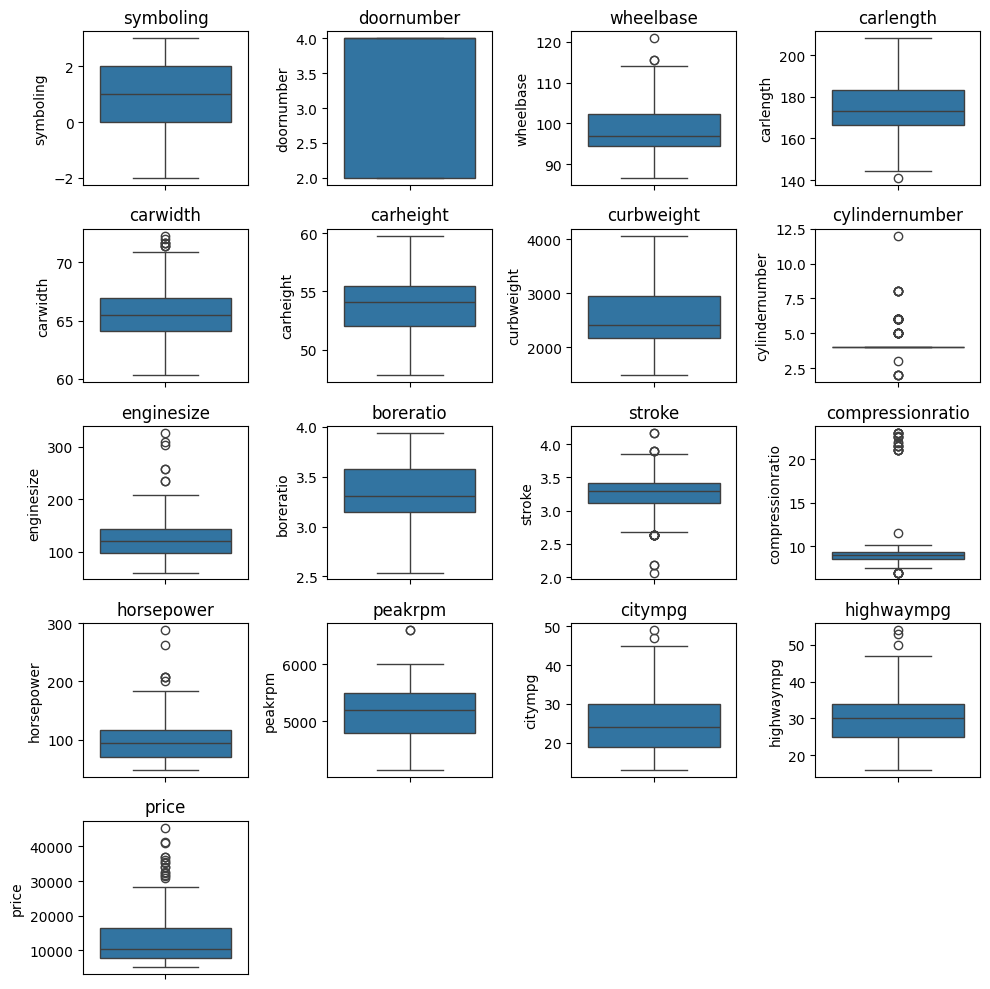

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
num_cols = df.select_dtypes(include = ["int64","float64"])
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##### As observed in the above boxplot, the column "price" is having more outliers compared to all other columns

##### Removal of outliers (IQR Method)

In [34]:
q1=df.price.quantile(0.25)
q1

7847.0

In [35]:
q3=df.price.quantile(0.75)
q3

16509.0

In [36]:
iqr=q3-q1
iqr

8662.0

In [37]:
low_whisk=q1-1.5*iqr
low_whisk

-5146.0

In [38]:
upp_whisk=q3+1.5*iqr
upp_whisk

29502.0

In [39]:
df=df[(df.price>low_whisk)&(df.price<upp_whisk)]
df4=df[(df.price>low_whisk)&(df.price<upp_whisk)] # variable to store the dataset after preprocessing
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


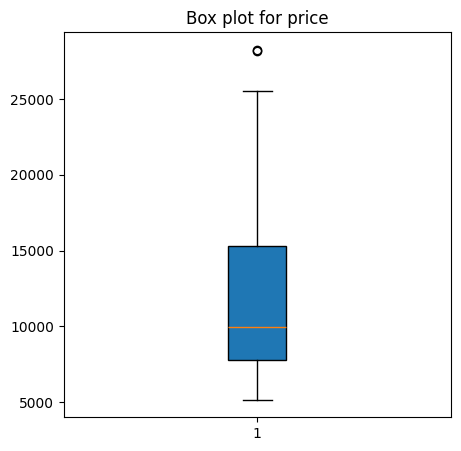

In [40]:
plt.figure(figsize=(5,5))  
plt.title("Box plot for price")
plt.boxplot(df["price"], patch_artist=True)
plt.show()

Outilers are removed

#### Label encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
cat_col=df.select_dtypes(include='object').columns
for i in cat_col:
    df[i]=LabelEncoder().fit_transform(df[i])

C:\Users\karun\AppData\Local\Temp\ipykernel_5864\250922320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=LabelEncoder().fit_transform(df[i])
C:\Users\karun\AppData\Local\Temp\ipykernel_5864\250922320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=LabelEncoder().fit_transform(df[i])
C:\Users\karun\AppData\Local\Temp\ipykernel_5864\250922320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [42]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model
0,3,1,0,2,0,2,0,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,0,75
1,3,1,0,2,0,2,0,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,0,114
2,1,1,0,2,2,2,0,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,0,28
3,2,1,0,4,3,1,0,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0
4,2,1,0,4,3,0,0,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,4,3,2,0,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,20,5
201,-1,1,1,4,3,2,0,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,20,4
202,-1,1,0,4,3,2,0,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,20,6
203,-1,0,1,4,3,2,0,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,20,8


#### Feature Selection

##### Correlation matrix

In [43]:
corr1=df.corr()
corr1

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand,Model
symboling,1.000000,0.184783,-0.044706,-0.658705,-0.563084,-0.043178,NaN,-0.509885,-0.323618,-0.206029,...,-0.160858,0.065241,-0.175040,0.079416,0.240745,-0.047081,0.017728,-0.126947,-0.166443,0.182124
fueltype,0.184783,1.000000,-0.375024,-0.184820,-0.141311,-0.153944,NaN,-0.348615,-0.237173,-0.283313,...,-0.081757,-0.248433,-0.986076,0.166920,0.488726,-0.262105,-0.196588,-0.233183,-0.065826,0.046752
aspiration,-0.044706,-0.375024,1.000000,0.013940,0.040319,0.100475,NaN,0.310523,0.286399,0.398080,...,0.277443,0.228545,0.265736,0.435035,-0.177192,-0.272391,-0.329669,0.423462,0.002517,-0.137408
doornumber,-0.658705,-0.184820,0.013940,1.000000,0.680789,-0.090760,NaN,0.452969,0.420184,0.248468,...,0.169897,-0.093788,0.181116,-0.079816,-0.226026,-0.039914,-0.053244,0.142560,0.191786,-0.101799
carbody,-0.563084,-0.141311,0.040319,0.680789,1.000000,-0.119462,NaN,0.422268,0.380545,0.197576,...,0.091758,-0.096877,0.133005,-0.068222,-0.076513,-0.031633,-0.067689,0.081340,0.124832,-0.097239
drivewheel,-0.043178,-0.153944,0.100475,-0.090760,-0.119462,1.000000,NaN,0.455805,0.434723,0.404882,...,0.427122,0.051782,0.152152,0.441782,-0.049201,-0.362941,-0.369161,0.547404,0.028919,-0.172725
enginelocation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,-0.509885,-0.348615,0.310523,0.452969,0.422268,0.455805,NaN,1.000000,0.859048,0.793433,...,0.524502,0.041536,0.302174,0.374596,-0.308960,-0.453729,-0.509665,0.666546,0.163237,-0.402689
carlength,-0.323618,-0.237173,0.286399,0.420184,0.380545,0.434723,NaN,0.859048,1.000000,0.831088,...,0.617032,0.038658,0.190387,0.561842,-0.258460,-0.644961,-0.663767,0.728329,0.201209,-0.334212
carwidth,-0.206029,-0.283313,0.398080,0.248468,0.197576,0.404882,NaN,0.793433,0.831088,1.000000,...,0.543600,0.151579,0.228013,0.600886,-0.192367,-0.605193,-0.631332,0.791242,0.055275,-0.369009


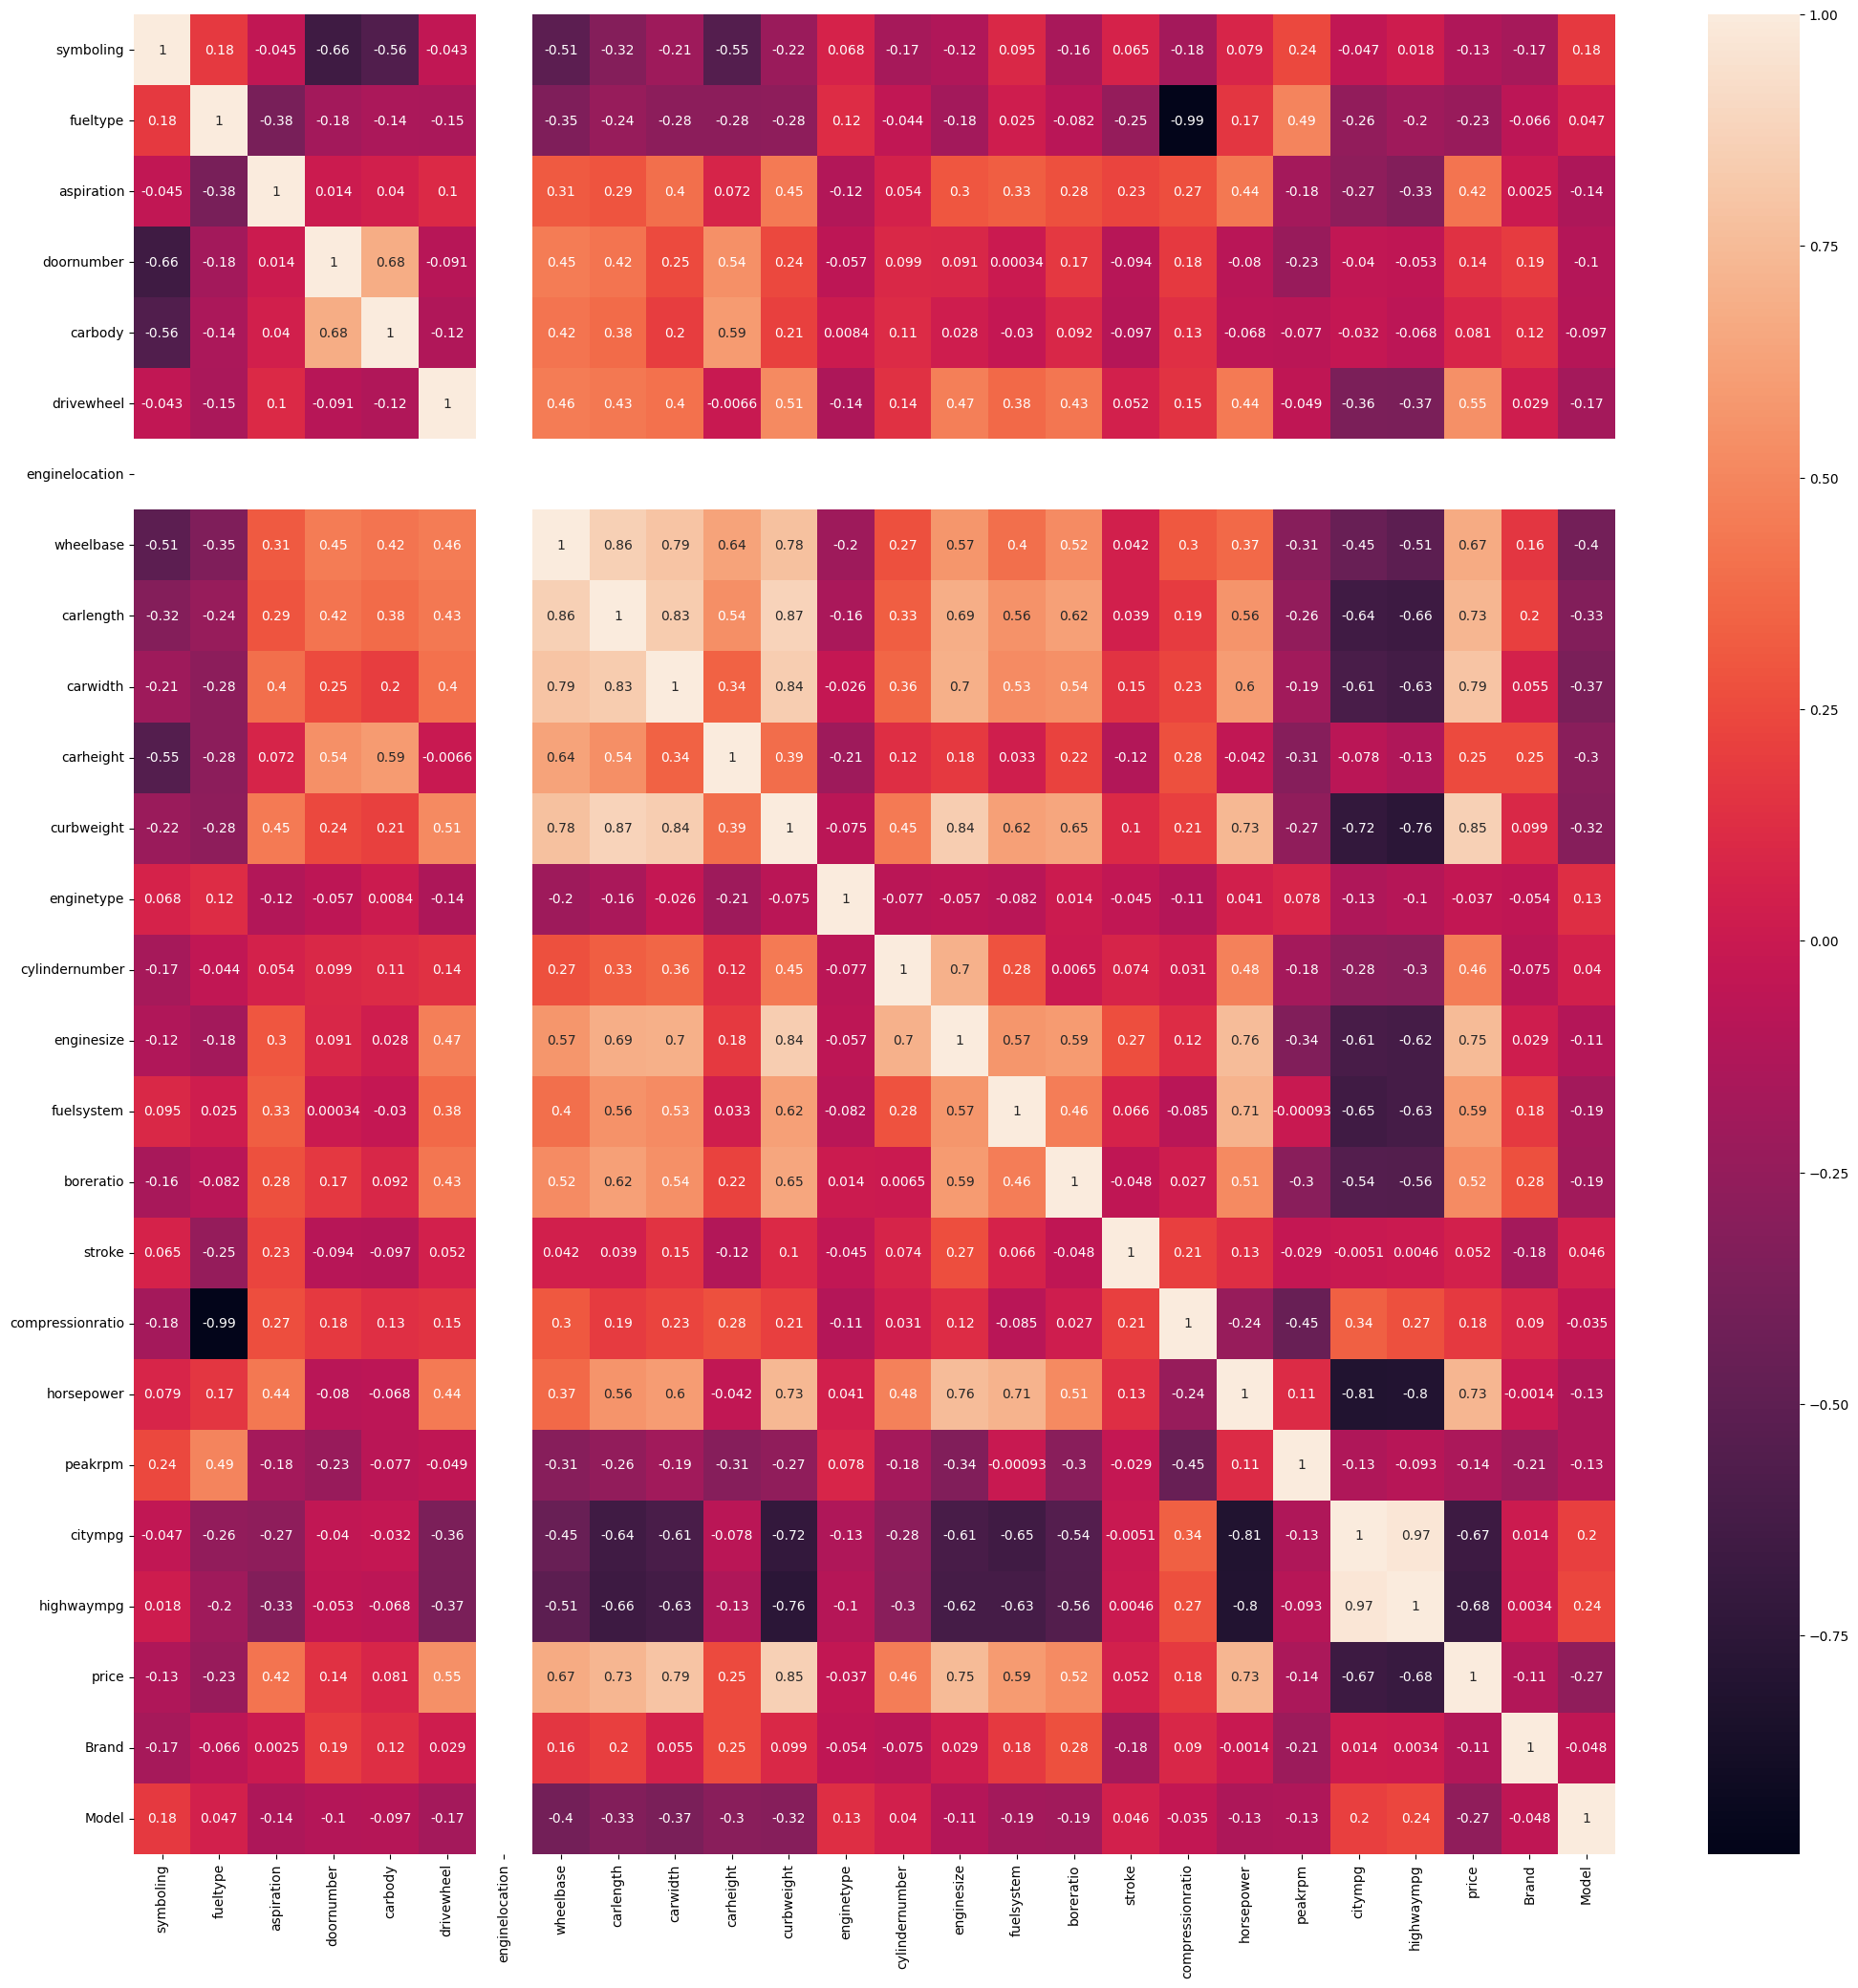

In [44]:
plt.figure(figsize=(25, 25)) 
sns.heatmap(corr1,annot=True)
plt.show()

We can drop the attributes with highest correlation values (>0.85)

## 1. LINEAR REGRESSION

#### Data Splitting. Training and Testing

In [45]:
X=df.iloc[:,~df.columns.isin(["price","enginelocation","curbweight"])]
Y=df.iloc[:,df.columns =="price"]


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=23)

In [47]:
#x_train

In [48]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression() #creating an instance of the class

In [49]:
lr.fit(x_train,y_train)  #training the model

LinearRegression()

In [50]:
predict=lr.predict(x_test)

In [51]:
#predict

#### Model Evaluation Metrics

In [52]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import math

print("MSE= ",(mean_squared_error(predict,y_test)))
print("RMSE= ",math.sqrt(mean_squared_error(predict,y_test)))
print("R2 score = ",r2_score(predict,y_test))
print("MAE= ",(mean_absolute_error(y_test,predict)))
print("Accuracy = ",lr.score(x_test,y_test))

MSE=  5589782.435507479
RMSE=  2364.2720730718534
R2 score =  0.7584590348117929
MAE=  1842.946141704566
Accuracy =  0.8156740971285908


## 2. DECISION TREE REGRESSION

#### Data Splitting. Training and Testing

In [78]:
X = df.iloc[:, df.columns !="price"]
Y=df.iloc[:,df.columns =="price"]

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=21)

In [80]:
from sklearn.tree import DecisionTreeRegressor

dt1=DecisionTreeRegressor(criterion='squared_error',max_depth=10,min_samples_leaf=6,random_state=121)

In [81]:
dt1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=6, random_state=121)

[Text(0.615, 0.9166666666666666, 'x[11] <= 2544.0\nsquared_error = 25164066.792\nsamples = 125\nvalue = 11766.372'),
 Text(0.37, 0.75, 'x[11] <= 2291.5\nsquared_error = 6208953.684\nsamples = 75\nvalue = 8630.447'),
 Text(0.4925, 0.8333333333333333, 'True  '),
 Text(0.26, 0.5833333333333334, 'x[11] <= 2115.5\nsquared_error = 1575073.655\nsamples = 47\nvalue = 7274.309'),
 Text(0.16, 0.4166666666666667, 'x[19] <= 68.5\nsquared_error = 724759.27\nsamples = 31\nvalue = 6632.435'),
 Text(0.08, 0.25, 'x[21] <= 33.0\nsquared_error = 456706.902\nsamples = 16\nvalue = 6188.188'),
 Text(0.04, 0.08333333333333333, 'squared_error = 132800.688\nsamples = 8\nvalue = 6625.25'),
 Text(0.12, 0.08333333333333333, 'squared_error = 398565.859\nsamples = 8\nvalue = 5751.125'),
 Text(0.24, 0.25, 'x[24] <= 84.5\nsquared_error = 575620.86\nsamples = 15\nvalue = 7106.3'),
 Text(0.2, 0.08333333333333333, 'squared_error = 455840.652\nsamples = 8\nvalue = 7377.062'),
 Text(0.28, 0.08333333333333333, 'squared_err

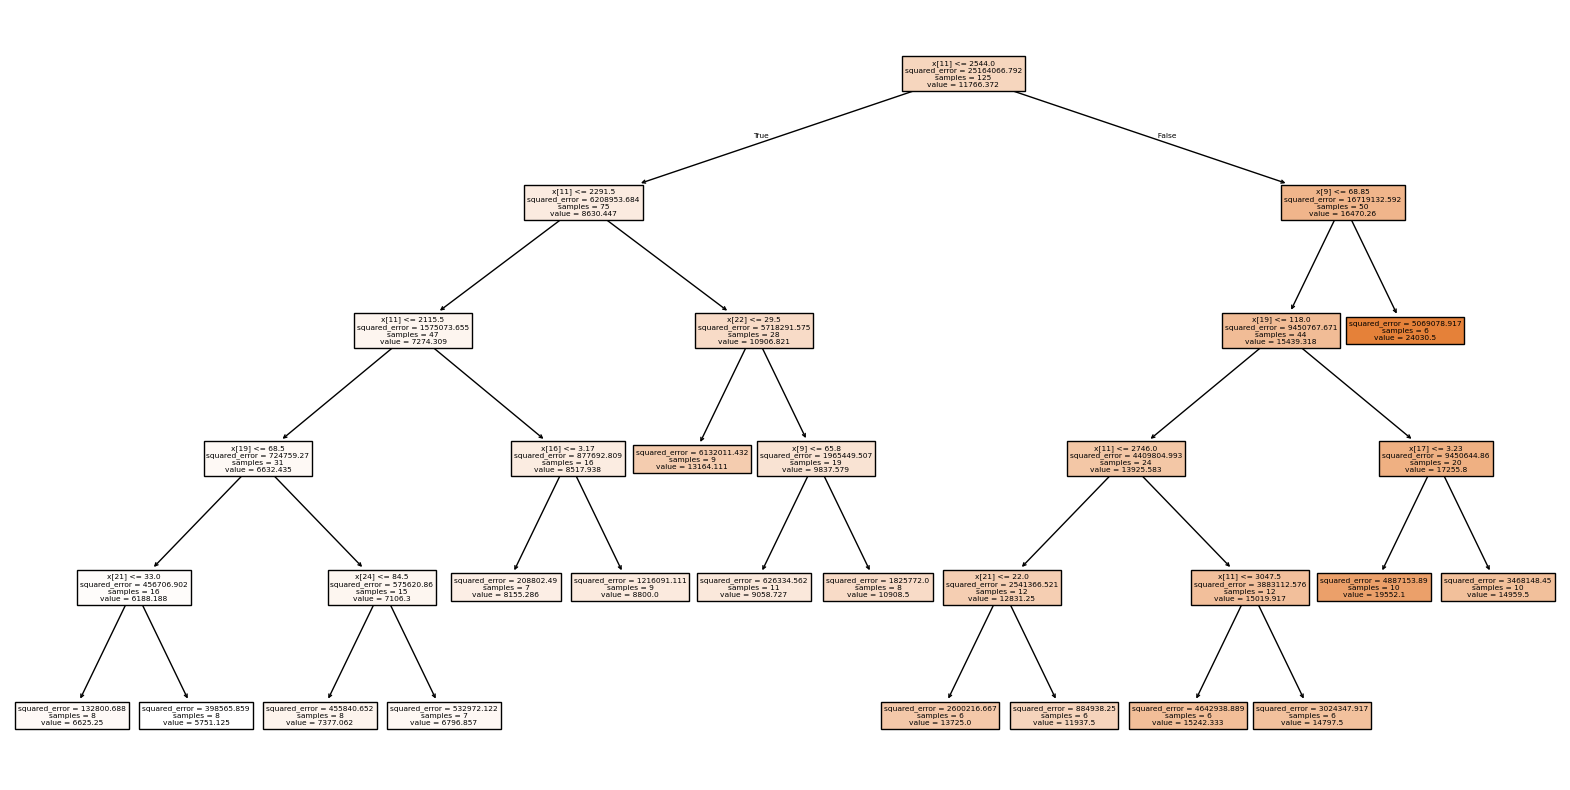

In [82]:
from sklearn import tree
plt.figure(figsize=(20,10),dpi=100)
tree.plot_tree(dt1,filled=True)

In [83]:
predict2=dt1.predict(x_test)

#### Evaluation Metrics

In [84]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import math

print("MSE= ",(mean_squared_error(predict2,y_test)))
print("RMSE= ",math.sqrt(mean_squared_error(predict2,y_test)))
print("R2 score = ",r2_score(predict2,y_test))
print("MAE= ",(mean_absolute_error(y_test,predict2)))


MSE=  6555623.423421445
RMSE=  2560.395169387227
R2 score =  0.6934941831156551
MAE=  1820.6985740282644


#### Cross validation

In [85]:
from sklearn.model_selection import cross_val_score

cross_val1=cross_val_score(dt1, x_train, y_train, cv=10) #repeating the iteration 10 times 
cross_val1

array([0.62915105, 0.7940645 , 0.8301819 , 0.79719193, 0.83947186,
       0.90617675, 0.87607424, 0.87693403, 0.91325929, 0.81896069])

In [86]:
best_iteration = np.argmax(cross_val1) + 1
print ("Best iteration =",best_iteration )
print ("Best_accuracy = ", cross_val1[best_iteration - 1])
print ("Mean accuracy =",np.mean(cross_val1))

Best iteration = 9
Best_accuracy =  0.9132592883538782
Mean accuracy = 0.828146623340522


##### The following steps are iteratively done (Hyperparameter tuning):

#####      1. Adjusting the depth

#####       2. Adjusting min_sample_leaf

#####       3. Training the model and calculating accuracy

#####       4. Adjusting train-test split

#####       5. Cross validation 

##### By repeatedly performing the above stepts we have adjusted the depth and min sample split of the decision tree so that maximum values in the  

##### dataset is included.Further splitting of the leaf nodes of the current decision tree may create nodes with very less number of samples which 

##### increases the complexity of the decision tree . This affects the accuracy of the model. So we have done pruning to reduce the number of nodes to 

##### create a best model. It was observed that the model provides the best accuracy when max_depth=10, min_samples_leaf=6, test data=33% of train  data. 
##### The best accuracy of the model after cross validation is 92.3% (at 8th iteration) and average of all iterations is 82.8%%

## 3. RANDOM FOREST REGRESSOR

### Data splitting, Training and Testing

In [63]:
X=df.iloc[:,df.columns!="price"]
Y=df.iloc[:,df.columns =="price"]

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=200)

In [65]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(random_state=300)
rf.fit(x_train,y_train)

C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=300)

In [66]:
ypred3=rf.predict(x_test)
ypred3

array([ 9353.12   , 10050.49   ,  9065.26   , 13292.97   , 16923.58   ,
       12654.495  , 17550.25002,  6545.77   , 14854.82   ,  8453.09   ,
        5996.17   ,  9407.49   ,  6456.51   , 10155.25   , 17280.88334,
        6862.635  , 10644.005  , 14129.58   , 18705.17167,  6996.935  ,
        7419.99   ,  7882.8    , 14320.68   ,  7253.745  ,  6975.19   ,
       13373.27   , 19787.44167,  6361.81   ,  9910.97   ,  5879.81   ,
        8941.69   , 13325.8    , 16280.39   ,  6546.25   ,  9856.19   ,
        7621.88   ,  7742.385  , 10198.16   ])

#### Evaluation Metrics

In [67]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import math

print("MSE= ",(mean_squared_error(ypred3,y_test)))
print("RMSE= ",math.sqrt(mean_squared_error(ypred3,y_test)))
print("R2 score = ",r2_score(ypred3,y_test))
print("MAE= ",(mean_absolute_error(y_test,ypred3)))
print("Accuracy = ",rf.score(x_test,y_test))

MSE=  1573858.6167103304
RMSE=  1254.5352193981364
R2 score =  0.8999618841627361
MAE=  972.6938600000002
Accuracy =  0.9206254633961874


## 4. GRADIENT BOOSTING REGRESSOR

#### Dataset Splitting, Training , Testing

In [68]:
X=df.iloc[:,df.columns!="price"]
Y=df.iloc[:,df.columns =="price"]

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=201)

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

gb=GradientBoostingRegressor(random_state=301)
gb.fit(x_train,y_train)

C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(random_state=301)

In [71]:
ypred4=gb.predict(x_test)
ypred4

array([ 7043.40987815,  8911.11090939,  6522.85576801,  8267.76271885,
        6383.24111697,  6312.37858941,  8204.49283995,  8468.67059431,
        6350.67493912, 21233.74073456, 14108.67891711,  8786.74289639,
       11759.49955844,  7409.33792384,  6150.3307067 ,  6443.37170087,
       14348.0374899 ,  6211.49714491,  9824.10975059, 11452.08381498,
       11839.15116331,  9427.83862938, 14785.57750053, 17255.23380061,
        9556.17667587, 16123.94528539,  6699.78267246,  9053.60379331,
       10137.02561688, 11297.28369985,  7133.76831894,  9744.3182247 ,
       11337.67724559,  7689.18418124, 17727.55995311,  6359.92312767,
        6496.63173641, 14675.34240933])

#### Evaluation Metrics

In [72]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import math

print("MSE= ",(mean_squared_error(ypred4,y_test)))
print("RMSE= ",math.sqrt(mean_squared_error(ypred4,y_test)))
print("R2 score = ",r2_score(ypred4,y_test))
print("MAE= ",(mean_absolute_error(y_test,ypred4)))
print("Accuracy = ",gb.score(x_test,y_test))

MSE=  4307851.785825145
RMSE=  2075.536505539025
R2 score =  0.697243607535332
MAE=  1349.064179672969
Accuracy =  0.8150688174305274


## 5. SUPPORT VECTOR REGRESSOR

#### Dataset Splitting, training and testing

In [73]:
X=df.iloc[:,df.columns!="price"]
Y=df.iloc[:,df.columns =="price"]

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=202)

In [75]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(x_train,y_train) 

C:\Users\karun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [76]:
ypred5=svr.predict(x_test)
ypred5

array([10254.28219287, 14157.32131502,  9965.1716908 ,  8658.11016632,
       10015.20472558, 11821.20126056,  9781.46529736, 13061.01171726,
       13961.11339034,  9936.14753864,  7631.30977089, 12849.20210883,
        6210.32370565, 17247.45569233,  7122.84497371, 17917.6267109 ,
        5816.20018138,  2882.88486729, 15580.41641834, 15908.96467181,
        6013.01207711, 11879.75283289, 10360.83483347,  6122.44885286,
        9565.03704075, 18516.25006562, 15552.96998602,  6061.11938284,
        7556.34604794,  6344.62983741,  7115.10186915,  6922.38951281,
       12054.84634947,  8706.35217056,  6494.09151224,  8579.35881877,
       13742.17108697, 10334.05845914])

#### Evaluation Metrics

In [77]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import math

print("MSE= ",(mean_squared_error(ypred5,y_test)))
print("RMSE= ",math.sqrt(mean_squared_error(ypred5,y_test)))
print("R2 score = ",r2_score(ypred5,y_test))
print("MAE= ",(mean_absolute_error(y_test,ypred5)))
print("Accuracy = ",svr.score(x_test,y_test))

MSE=  7440688.858462999
RMSE=  2727.76261035725
R2 score =  0.4898505313738134
MAE=  1759.4219128720702
Accuracy =  0.697755424703314


## CONCLUSION

##### Comparing the acccuracies of all models, the highest is obtained in Random Forest Regressor (92%) and lowest is SVM Regressor Model (69%)